### Problem Statement:
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

1.Time of purchase patterns (making sure last-minute purchases are expensive)
2.Keeping the flight as full as they want it (raising prices on a flight which is filling up in order
to reduce sales and hold back inventory for those expensive last-minute expensive purchases) 
So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df=pd.read_csv("flight_fare.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,Air Asia,22:40,01:25,4537,Bengaluru,Delhi,2h 45m,Non,2023-02-26
1,1,Air Asia,06:05,08:55,4537,Bengaluru,Delhi,2h 50m,Non,2023-02-26
2,2,SpiceJet,19:30,22:15,5235,Bengaluru,Delhi,2h 45m,Non,2023-02-26
3,3,IndiGo,18:00,20:50,5236,Bengaluru,Delhi,2h 50m,Non,2023-02-26
4,4,IndiGo,07:00,09:50,5236,Bengaluru,Delhi,2h 50m,Non,2023-02-26
...,...,...,...,...,...,...,...,...,...,...
6828,6828,IndiGo,04:40,10:45,18914,Kolkata,Hyderabad,6h 5m,1,2023-04-01
6829,6829,IndiGo,14:25,20:35,18914,Kolkata,Hyderabad,6h 10m,1,2023-04-01
6830,6830,IndiGo,10:45,17:20,18914,Kolkata,Hyderabad,6h 35m,1,2023-04-01
6831,6831,IndiGo,10:45,17:55,18914,Kolkata,Hyderabad,7h 10m,1,2023-04-01


In [3]:
# checking shape of dataset
print("The no. of Rows in dataset is: ",df.shape[0],"and no. of columns is ",df.shape[1])

The no. of Rows in dataset is:  6833 and no. of columns is  10


In [4]:
# checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6833 non-null   int64 
 1   Flight name     6833 non-null   object
 2   Departure_time  6833 non-null   object
 3   Arrival_time    6833 non-null   object
 4   Price           6833 non-null   int64 
 5   Source          6833 non-null   object
 6   Destination     6833 non-null   object
 7   Duration        6833 non-null   object
 8   No of stop      6833 non-null   object
 9   Date            6833 non-null   object
dtypes: int64(2), object(8)
memory usage: 534.0+ KB


In [5]:
# checking null value
df.isnull().sum()

Unnamed: 0        0
Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

In [6]:
#checking basic info 
df.describe()

,Unnamed: 0,Price
count,6833.000000,6833.000000
mean,3416.000000,9756.206205
std,1972.661527,3655.575511
min,0.000000,1167.000000
25%,1708.000000,7138.000000
50%,3416.000000,9482.000000
75%,5124.000000,12117.000000
max,6832.000000,29154.000000


In [7]:
#checking unique in dataset
df.nunique().sort_values()

Source               2
Destination          4
No of stop           4
Date                 7
Flight name          8
Departure_time     220
Arrival_time       253
Duration           337
Price             1069
Unnamed: 0        6833
dtype: int64

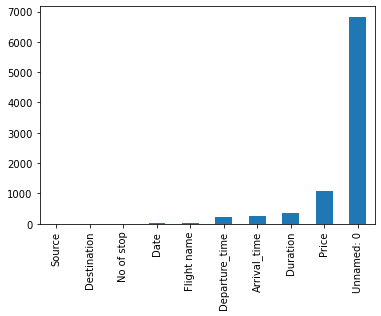

In [8]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()
plt.show()

### EDA(Exploratory Data Analysis):

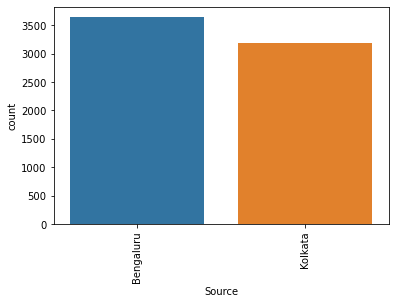

In [9]:
sns.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()

#### For bangaluru flight ratio is slightly higher than Kolkata 

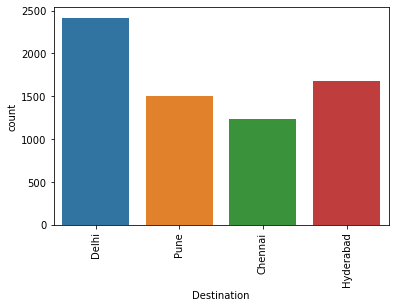

In [10]:
sns.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

#### Flight leading toward Delhi are of greater in number as compared to other destination from both the location

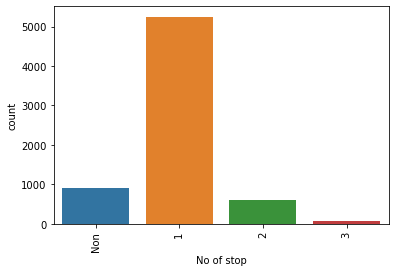

In [11]:
sns.countplot(df["No of stop"],data=df)
plt.xticks(rotation=90)
plt.show()

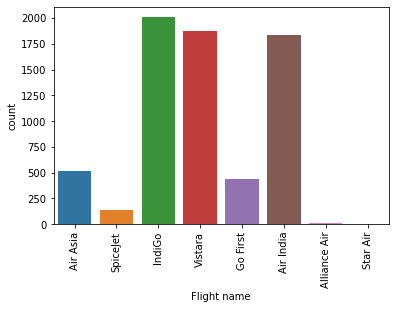

In [12]:
sns.countplot(df["Flight name"],data=df)
plt.xticks(rotation=90)
plt.show()

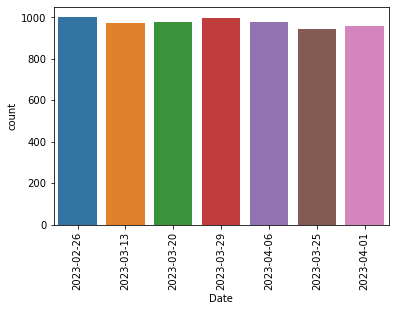

In [13]:
sns.countplot(df["Date"],data=df)
plt.xticks(rotation=90)
plt.show()

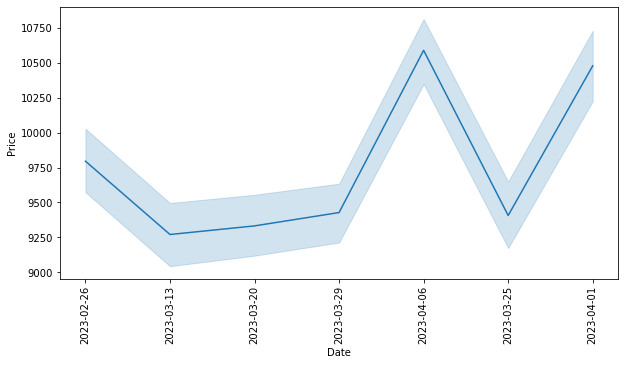

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(df["Date"],df["Price"])
plt.xticks(rotation=90)
plt.show()

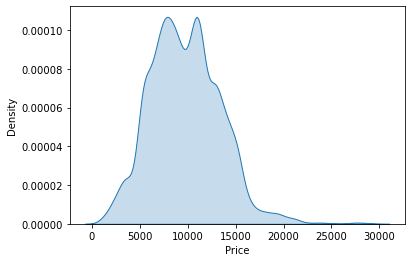

In [15]:
sns.kdeplot(df["Price"],data=df,fill=True)
plt.show()

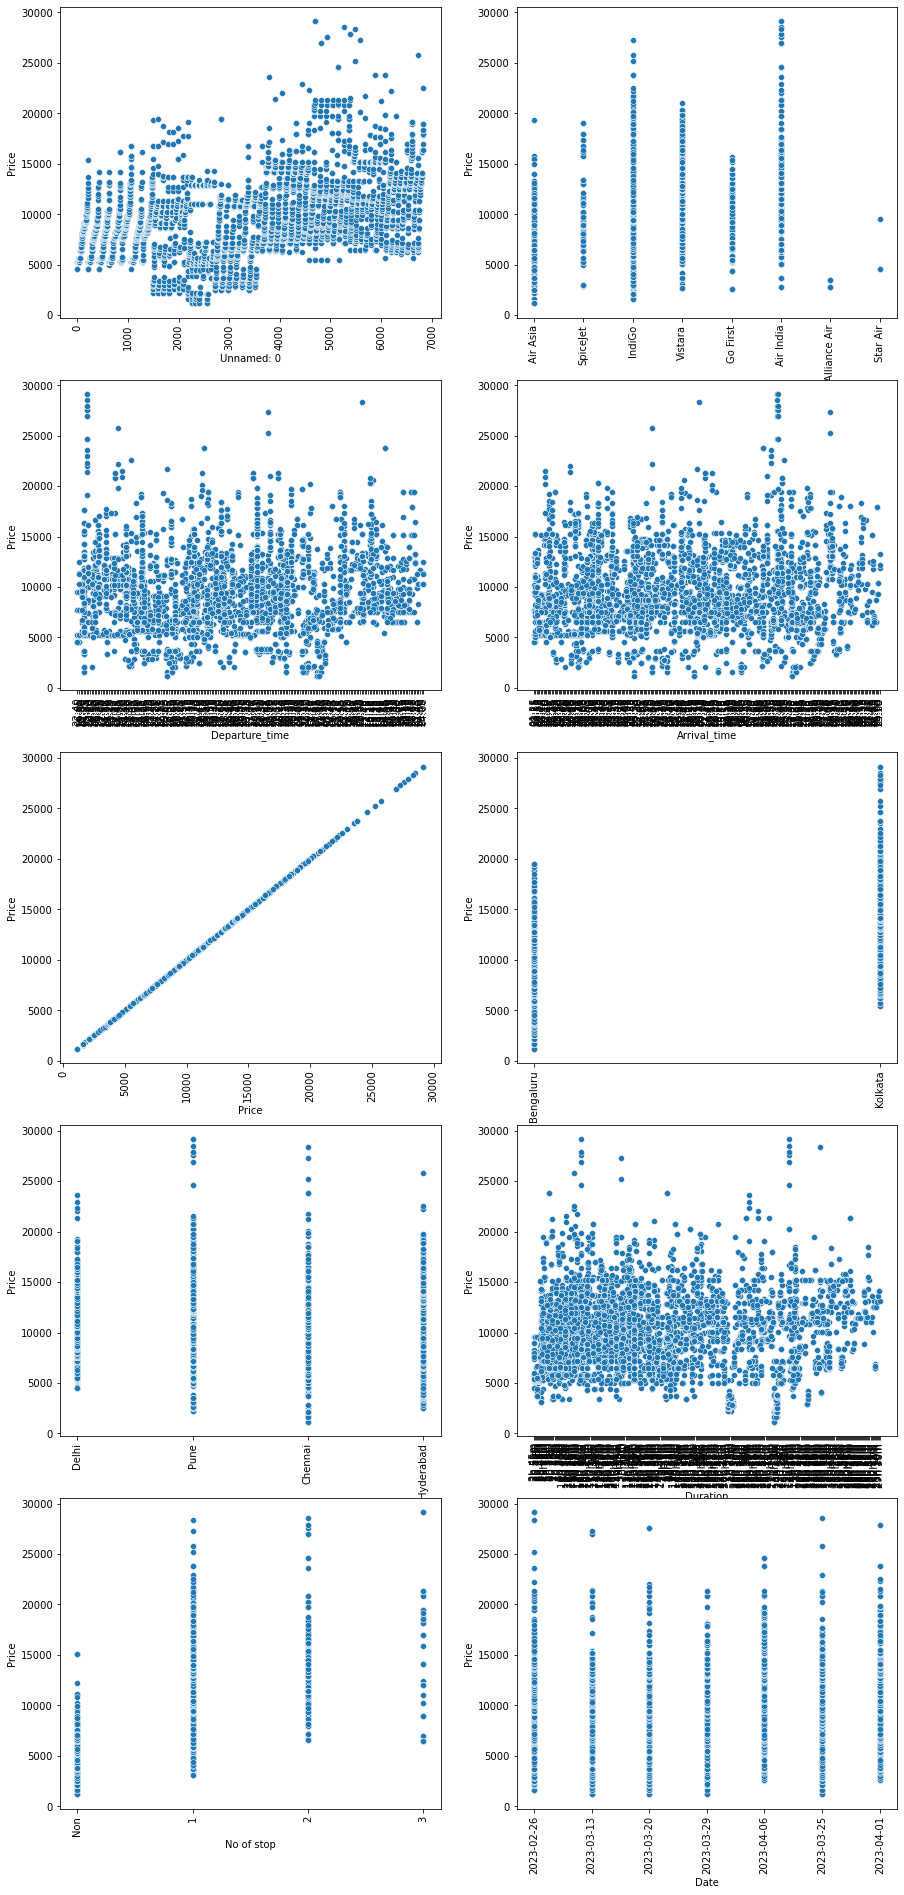

In [16]:
# Bivariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

Air India have maximun travel price as compare to other flights.

2 stop flight have high fare as compare to other stops.

flight to pune have maximum fare may be it is travelling by diferent route and haulting a bit in between

early morning flight are expensive as compare to afternoon flight.

In [17]:
# splitting date into date and month 
df["Date"]= pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month

In [18]:
# splitting daparture time and arrival time
df["Departure_time"] = pd.to_datetime(df["Departure_time"])

df["dep_hour"] = df["Departure_time"].dt.hour

df["dep_min"] = df["Departure_time"].dt.minute

In [19]:
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"])
df['Arr_hour'] = df["Arrival_time"].dt.hour
df['Arr_min'] = df["Arrival_time"].dt.minute

In [20]:
# Dropping unwanted columns 
df.drop(["Date","Departure_time","Arrival_time","Unnamed: 0"],axis=1,inplace=True)

In [21]:
# splitting duration into and hour and min in seperate column for better understanding
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [22]:
df.drop(["Duration"],inplace=True,axis=1)

In [23]:
# replacing non with 0 to make it a discrete column as model will not understan non
df["No of stop"] = df["No of stop"].replace("Non",0)

In [24]:
# changing datatype of int
df["No of stop"]= df["No of stop"].astype("int64")

In [25]:
# replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

In [26]:
# verifying datatype is correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  6833 non-null   object
 1   Price        6833 non-null   int64 
 2   Source       6833 non-null   int64 
 3   Destination  6833 non-null   object
 4   No of stop   6833 non-null   int64 
 5   Day          6833 non-null   int64 
 6   Month        6833 non-null   int64 
 7   dep_hour     6833 non-null   int64 
 8   dep_min      6833 non-null   int64 
 9   Arr_hour     6833 non-null   int64 
 10  Arr_min      6833 non-null   int64 
 11  hours        6833 non-null   int64 
 12  minutes      6833 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 694.1+ KB


### Label encoding:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  6833 non-null   object
 1   Price        6833 non-null   int64 
 2   Source       6833 non-null   int64 
 3   Destination  6833 non-null   object
 4   No of stop   6833 non-null   int64 
 5   Day          6833 non-null   int64 
 6   Month        6833 non-null   int64 
 7   dep_hour     6833 non-null   int64 
 8   dep_min      6833 non-null   int64 
 9   Arr_hour     6833 non-null   int64 
 10  Arr_min      6833 non-null   int64 
 11  hours        6833 non-null   int64 
 12  minutes      6833 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 694.1+ KB


In [28]:
en=["Flight name","Destination"]

In [29]:
# for converting categorical to numericalcolumn as machine learing understands numerical value not text
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df[en]:
    df[i]=label.fit_transform(df[i])
    
df

,Flight name,Price,Source,Destination,No of stop,Day,Month,dep_hour,dep_min,Arr_hour,Arr_min,hours,minutes
0,0,4537,1,1,0,26,2,22,40,1,25,2,45
1,0,4537,1,1,0,26,2,6,5,8,55,2,50
2,5,5235,1,1,0,26,2,19,30,22,15,2,45
3,4,5236,1,1,0,26,2,18,0,20,50,2,50
4,4,5236,1,1,0,26,2,7,0,9,50,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828,4,18914,2,2,1,1,4,4,40,10,45,6,5
6829,4,18914,2,2,1,1,4,14,25,20,35,6,10
6830,4,18914,2,2,1,1,4,10,45,17,20,6,35
6831,4,18914,2,2,1,1,4,10,45,17,55,7,10


In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[["Arr_hour","Day"]]= pt.fit_transform(df[["Arr_hour","Day"]])

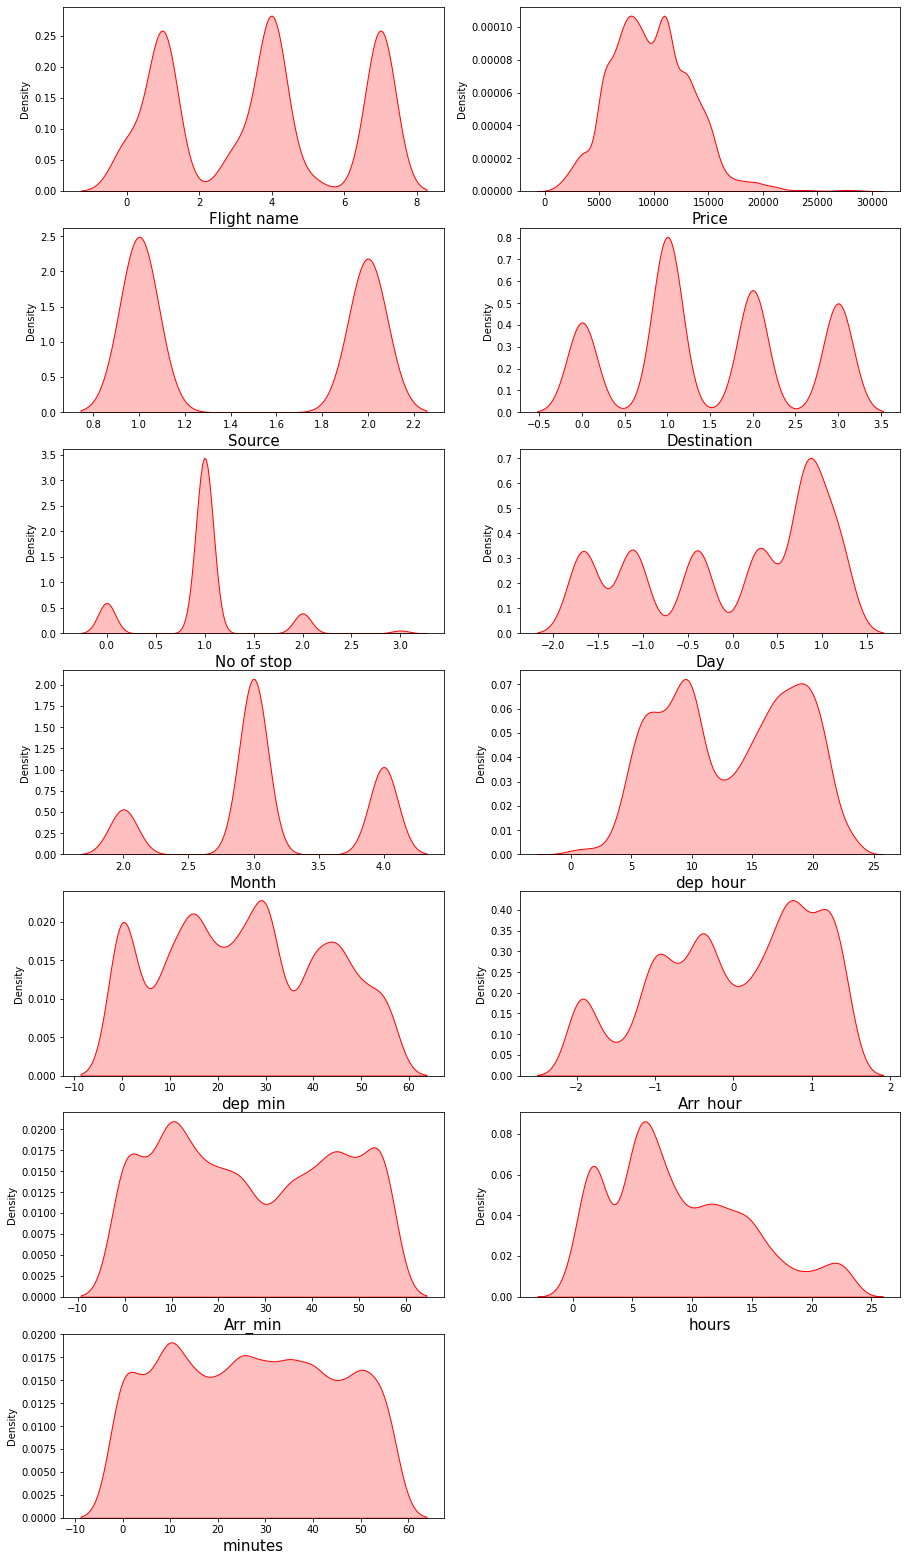

In [31]:
# univariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show()

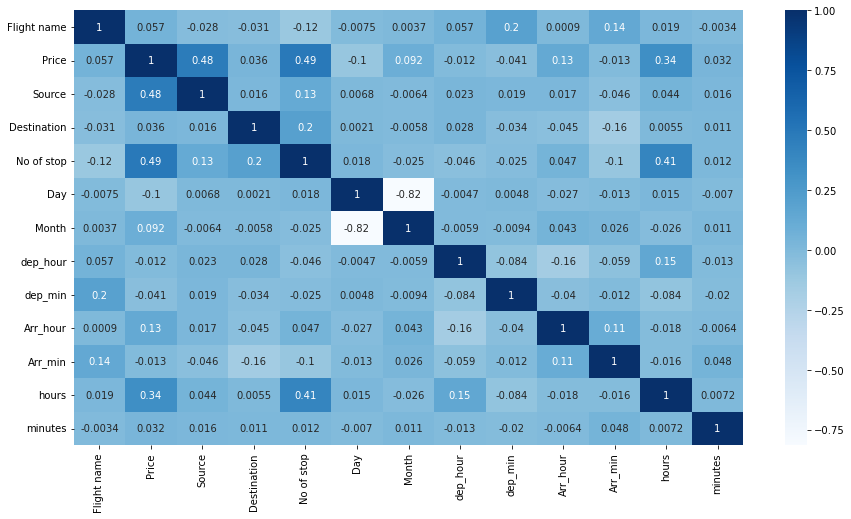

In [32]:
# multivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

### Dividing data into X and Y

In [33]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [34]:
x.shape

(6833, 12)

In [35]:
y.shape

(6833,)

### scaling X values

In [36]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [37]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [38]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000
mean,0.523447,0.466852,0.501390,0.326504,0.588571,0.568637,0.574399,0.462209,0.587925,0.491479,0.382383,0.489549
std,0.352327,0.498937,0.341720,0.172852,0.353099,0.320620,0.235580,0.305785,0.295407,0.332563,0.252678,0.312222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.333333,0.333333,0.194714,0.500000,0.391304,0.181818,0.351220,0.181818,0.217391,0.181818
50%,0.571429,0.000000,0.333333,0.333333,0.694236,0.500000,0.565217,0.454545,0.619672,0.454545,0.347826,0.454545
75%,1.000000,1.000000,0.666667,0.333333,0.898979,1.000000,0.782609,0.727273,0.854897,0.818182,0.565217,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Spliting Train and Test data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)


In [40]:
x_train.shape

(4988, 12)

In [41]:
x_test.shape

(1845, 12)

In [42]:
y_train.shape

(4988,)

In [43]:
y_test.shape

(1845,)

## Model building:

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Linear regression

In [45]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.47824423244998227


In [46]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 6899067.043261176
MAE: 2033.3442486047381
r2_score: -0.09699707603624064


###  RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.981367777068875


In [48]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 1409013.2157053472
MAE: 677.5918910698155
r2_score: 0.8764735124141521


### DecisionTreeRegressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9989101491994087


In [50]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 2569756.116124661
MAE: 690.9119241192412
r2_score: 0.8108359251195221


### GradientBoostingRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.703334687027577


In [52]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 4003749.0673622256
MAE: 1478.299754737946
r2_score: 0.48205182537113345


### Cross validation:

In [53]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 7247439.187406, 3132005.000183
RF    : 4217984.848127, 2649452.730679
DTR    : 6656634.304465, 3777243.166126
GBR    : 5409190.872127, 2782999.318737


### HYPER PARAMETER TUNING:
### GridSearchCV
### RandomForestRegressor

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [56]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [57]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [58]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [59]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 1409013.2157053472
MAE: 677.5918910698155
r2_score: 0.8764735124141521


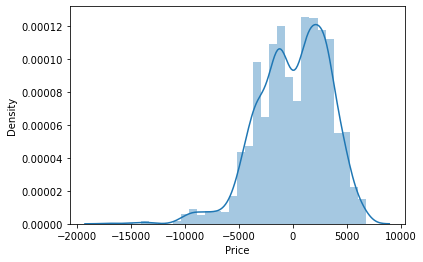

In [60]:
sns.distplot(RF_grid_pred-y_test)
plt.show()

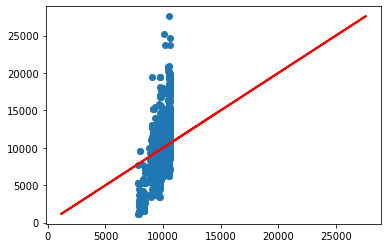

In [61]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')
plt.show()

In [62]:
import joblib
joblib.dump(RF_grid.best_estimator_,'Flight_Price_Pediction_Model building.obj')

['Flight_Price_Pediction_Model building.obj']